In [1]:
import sys
import string
import itertools
from collections import Counter, defaultdict
import re

from pathlib import Path
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext line_profiler

In [3]:
data = Path('../data/day_07.txt').read_text()

In [4]:
positions = np.array(sorted([int(k) for k in data.split(',')]))

In [5]:
len(positions), len(Counter(positions))

(1000, 667)

In [6]:
def part_a(positions):
    min_fuel = float('inf')
    for pos in range(positions[0], positions[-1] + 1):
        fuel_required = np.abs(positions - pos).sum()
        if fuel_required < min_fuel:
            min_fuel = fuel_required
        else: # this optimization works since this is a convex problem with just 1 minima .. otherwise would have to evaluate all mins
            break
    return min_fuel

print(part_a(positions))
%timeit part_a(positions)

344138
1.45 ms ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
%lprun -f part_a part_a(positions)

Timer unit: 1e-06 s

Total time: 0.004183 s
File: <ipython-input-6-3faa452290a6>
Function: part_a at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def part_a(positions):
     2         1          3.0      3.0      0.1      min_fuel = float('inf')
     3       360        153.0      0.4      3.7      for pos in range(positions[0], positions[-1] + 1):
     4       360       3735.0     10.4     89.3          fuel_required = np.abs(positions - pos).sum()
     5       360        194.0      0.5      4.6          if fuel_required < min_fuel:
     6       359         97.0      0.3      2.3              min_fuel = fuel_required
     7                                                   else: # this optimization works since this is a convex problem with just 1 minima .. otherwise would have to evaluate all mins
     8         1          1.0      1.0      0.0              break
     9         1          0.0      0.0      0.0  

In [8]:
def part_b(positions):
    min_fuel = float('inf')
    for pos in range(positions[0], positions[-1] + 1):
        arr = np.abs(positions - pos)
        fuel_required = (arr ** 2 + arr).sum()
        if fuel_required < min_fuel:
            min_fuel = fuel_required
        else: # this optimization works since this is a convex problem with just 1 minima .. otherwise would have to evaluate all mins
            break
    return min_fuel // 2

print(part_b(positions))
%timeit part_b(positions)

94862124
2.96 ms ± 34 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
%lprun -f part_b part_b(positions)

Timer unit: 1e-06 s

Total time: 0.007196 s
File: <ipython-input-8-bf30158a4d92>
Function: part_b at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def part_b(positions):
     2         1          2.0      2.0      0.0      min_fuel = float('inf')
     3       484        160.0      0.3      2.2      for pos in range(positions[0], positions[-1] + 1):
     4       484       2988.0      6.2     41.5          arr = np.abs(positions - pos)
     5       484       3621.0      7.5     50.3          fuel_required = (arr ** 2 + arr).sum()
     6       484        263.0      0.5      3.7          if fuel_required < min_fuel:
     7       483        160.0      0.3      2.2              min_fuel = fuel_required
     8                                                   else: # this optimization works since this is a convex problem with just 1 minima .. otherwise would have to evaluate all mins
     9         1          1.0      1

In [10]:
# %%timeit

n = np.arange(positions[0], positions[-1] + 1)
x = np.zeros((len(positions), positions[-1] + 1 - positions[0]), dtype=int)
z = np.abs(x + n - positions.reshape(-1,1))
(z * (z + 1)).sum(axis=0).min() // 2, z.sum(axis=0).min()

(94862124, 344138)

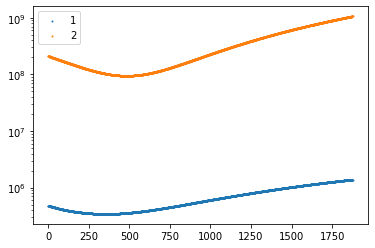

In [11]:
plt.scatter(n, z.sum(axis=0), s=1, label='1')
plt.scatter(n, (z * (z + 1) // 2).sum(axis=0), s=1, label='2')
# plt.scatter(n, (z * (z + 1) * (2 * z + 1) // 6).sum(axis=0), s=1, label='3')
# plt.scatter(n, ((z * (z + 1) // 2) ** 2).sum(axis=0), s=1, label='4')
plt.yscale('log')
plt.legend()
plt.show()

# Why Median for Part 1

Objective is to minimize $y = \sum{|k - x_i|}$

$$ \frac{dy}{dk} = \sum_{i} \frac{d}{dk} |k - x_i| = 0 $$
$$ \sum_{i} sign(k - x_i) = 0 $$

sum of signs will be 0 if there are equal number of +1s and -1s. This implies that `k` has to be in the middle of the values. i.e. the median

## Why Mean is a good approximation for Part 2

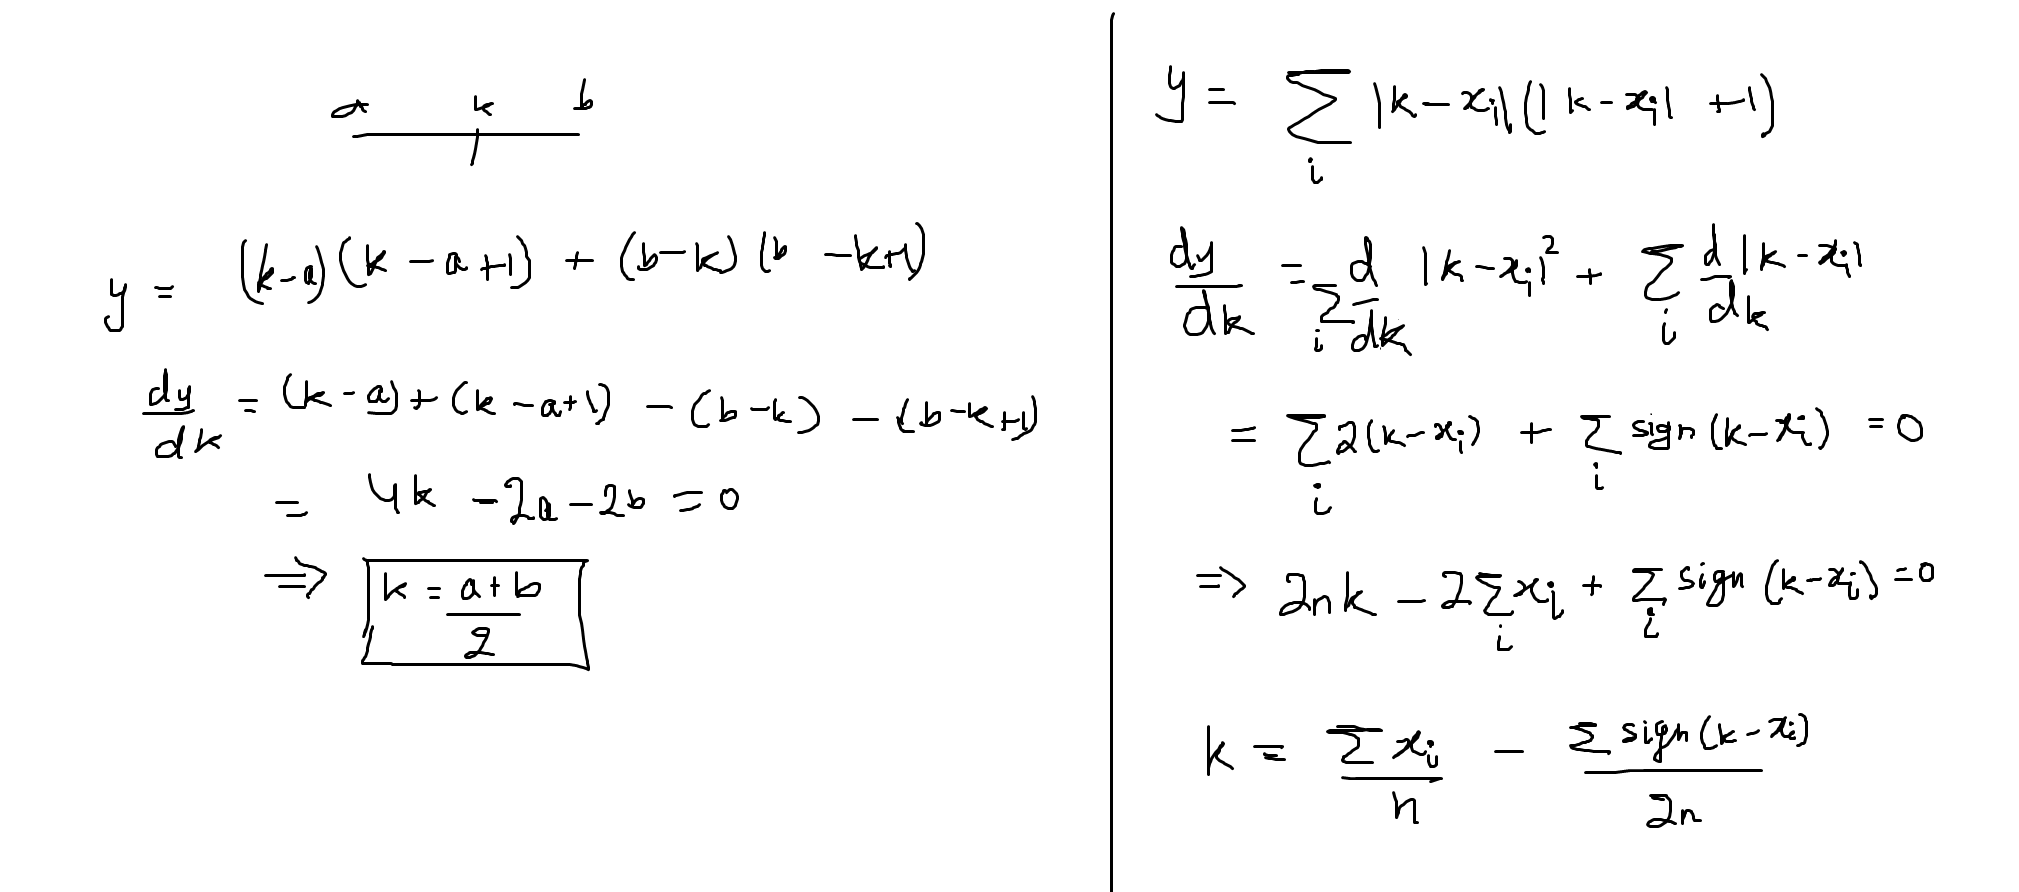

As shown above

$$k = \frac{\sum{x_i}}{n} - \frac{\sum{sign(k - x_i)}}{2n}$$

Note:

1. This is not closed w.r.t. k (term on the right is in terms of k), but the second part is bounded by (-0.5, +0.5) because sum of signs is bounded by (-n, n).
2. Part B(2) has discrete numbers, not continuous so while actual optimal value may be a decimal, we would still need to check around the mean (potentially checking mean - 1, mean, mean + 1)

In [12]:
def solve_part_a(positions):
    # sorting already done earlier
    median = positions[len(positions) // 2]
    return np.abs(positions - median).sum()

print(solve_part_a(positions))
%timeit solve_part_a(positions)

def solve_part_b(positions):
    def get_cost(arr, pos):
        abs_arr = np.abs(arr - pos)
        return (abs_arr ** 2 + abs_arr).sum()

    mean = int(np.mean(positions))
    return min([get_cost(positions, k) for k in range(mean-1, mean+2)]) // 2

print(solve_part_b(positions))
%timeit solve_part_b(positions)

344138
5.05 µs ± 37.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
94862124
31.4 µs ± 616 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
